# Assignment 2: Plottings

This assignment is about plotting.

### How to hand in
The assignment is expected to be published on GitHub, but the actual hand-in is on peergrade and should contain only a link to a MyBinder. See the notebook `12-Assignments` if you don't know what that means.


Create data visualizations comparing different groups of Copenhagen citizens. For example:
1. Create a bar plot that shows distribution of german and british citizens in terms of age.
2. How many French are there compared to Germans and how are they distributed over various neighbourhoods?
3. Create a pie chart showing the 5 major citizen groups of age between 20-65
4. (red assignment) Try to add the markers that you get from the GeoJson response exercise 2 to the map.
  
**Hint**: Make use of https://www.dst.dk/da/Statistik/dokumentation/Times/forebyggelsesregistret/statkode.aspx to find the citizenship category numbers.

For exercise 4 make use of:
```
folium.Marker(
[12.578995447902946, 55.713167699503515],
popup='some text here'
).add_to(map_osm)
```
and follow the documentation at http://folium.readthedocs.io/en/latest/quickstart.html


## 1. Create a bar plot that shows distribution of german and british citizens in terms of age.

<IPython.core.display.Javascript object>


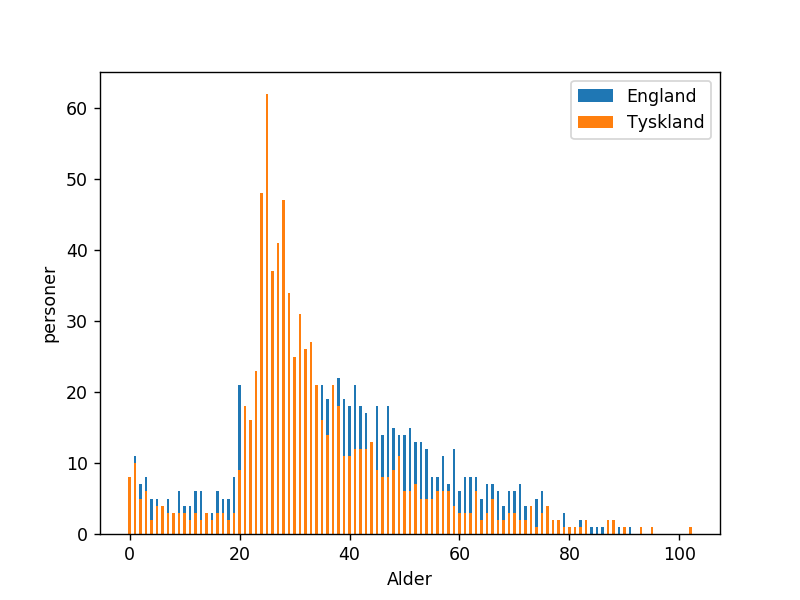

In [1]:
# Exercise 1 Pandas solution (sort of unstable)
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("befkbhalderstatkode.csv")

#print(data.STATKODE == 5180)
#bri = data[data[data.AAR == 2015] and data[data.STATKODE == 5170]]

bri = data[(data["AAR"] == 2015) & (data["STATKODE"] == 5170)]
ger = data[(data["AAR"] == 2015) & (data["STATKODE"] == 5180)]
#ger = data[data.STATKODE == 5180]
#print(bri)
plt.bar(bri.ALDER, bri.PERSONER, width=0.5, align='center')
plt.bar(ger.ALDER, ger.PERSONER, width=0.5, align='center')
plt.xlabel("Alder")
plt.ylabel("personer")
plt.legend(["England", "Tyskland"])
#print(bri.ALDER) #17k
#print(ger.PERSONER) #13k
plt.show()

<IPython.core.display.Javascript object>


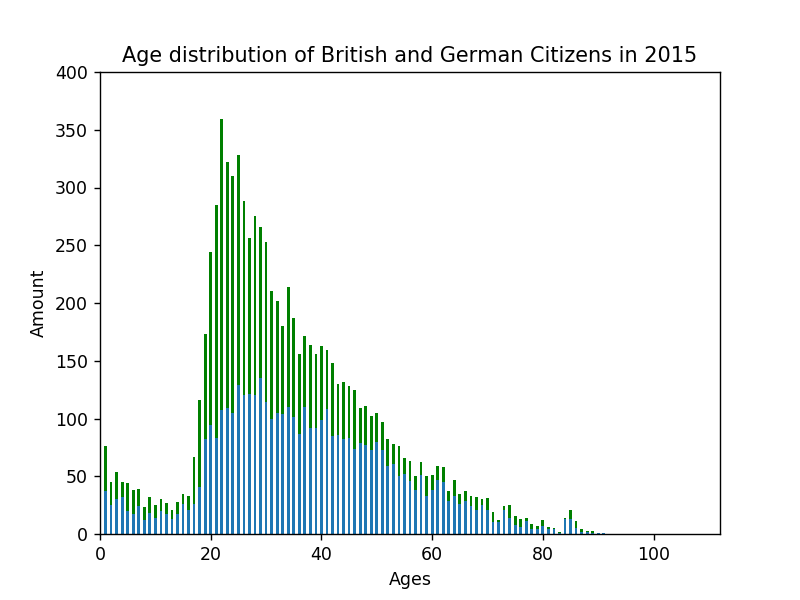

In [2]:
# Exercise 1 alternative solution
import kkdata

# function returning two dicts: (key:value) = (age:amount_of_citizens)
def get_population_stat(year):
    neighbourhoods = kkdata.STATISTICS[year].keys()
    age_range = set([])
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year][n].keys())
        
    british_per_age = {}
    german_per_age = {}

    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year][n].keys():
                # set of countrycodes under this particular age:
                c_codes = set(kkdata.STATISTICS[year][n][age].keys()) 
                # adding the amount of british & german citizens for this age
                if 5170 in c_codes:
                    british_per_age.setdefault(age, 0)
                    british_per_age[age] += kkdata.STATISTICS[year][n][age][5170]
                if 5180 in c_codes:
                    german_per_age.setdefault(age, 0)
                    german_per_age[age] += kkdata.STATISTICS[year][n][age][5180]    
    
    return british_per_age, german_per_age

british_per_age, german_per_age = get_population_stat(2015)

#harmonize: ensure both data collections have the same keys = x-axis
def harmonize_keys(first_dict, second_dict): 
    for k, v in first_dict.items():
        if not k in second_dict.keys():
            second_dict[k] = 0

harmonize_keys(german_per_age, british_per_age)
harmonize_keys(british_per_age, german_per_age)

# gets lists of ages for british and german respectively, and sorts them
ages = list(british_per_age.keys())
ages.sort()
agesgerman = list(german_per_age.keys())
agesgerman.sort()

# gets lists with amount respectively british and german
no_british = list(british_per_age.values())
no_germans = list(german_per_age.values())

# prints the chart
%matplotlib notebook
import matplotlib.pyplot as plt
plt.bar(ages, no_british, width=0.5, linewidth=0, align='center')
plt.ticklabel_format(useOffset=False)
plt.axis([0, max(ages) + 10, 0, 400])
title = 'Age distribution of British and German Citizens in {}'.format(2015)
plt.title(title, fontsize=12)
plt.xlabel("Ages", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.bar(agesgerman, no_germans, width=0.5, linewidth=0, align='center',color='green', bottom=no_british)
plt.show()

## 2. How many French are there compared to Germans and how are they distributed over various neighbourhoods?

<IPython.core.display.Javascript object>


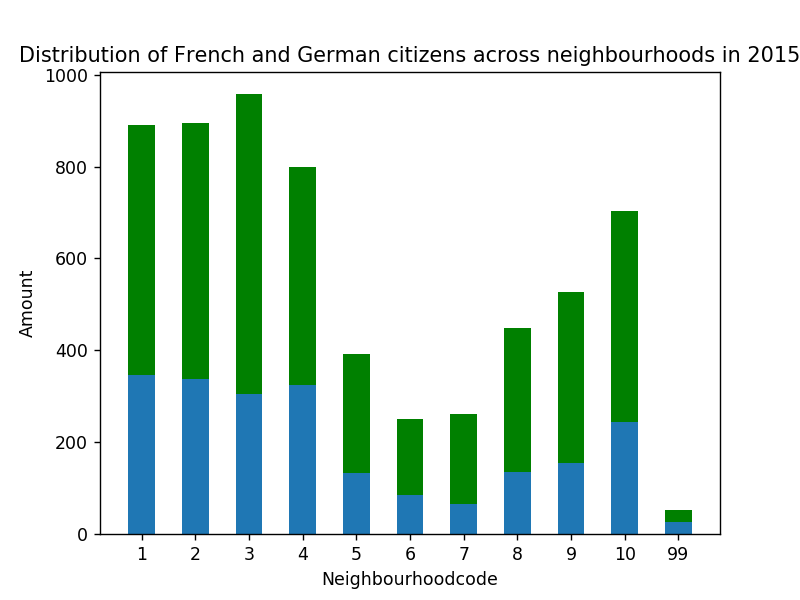

In [4]:
# Exercise 2
import kkdata

neighbourhoods = set([])
age_range = set([])

def getdicts(year):
    # getting set of neighbourhoodcodes
    neighbourhoods.update(kkdata.STATISTICS[year].keys())
    # getting set of age_ramges
    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year][n].keys())
    
    french_per_hood = {}
    germans_per_hood = {}

    # adding keys and values to the two dicts
    for n in neighbourhoods:
        for age in age_range:
            if age in kkdata.STATISTICS[year][n].keys():
                    c_codes = set(kkdata.STATISTICS[year][n][age].keys())
                    if 5130 in c_codes:
                        french_per_hood.setdefault(n, 0)
                        french_per_hood[n] += kkdata.STATISTICS[year][n][age][5130]
                    if 5180 in c_codes:    
                        germans_per_hood.setdefault(n, 0)
                        germans_per_hood[n] += kkdata.STATISTICS[year][n][age][5180]
        
    return french_per_hood, germans_per_hood
        
french_per_hood, germans_per_hood = getdicts(2015)
    
# getting amount of respectively french and german as list
amount_french = list(french_per_hood.values())
amount_germans = list(germans_per_hood.values())
# getting neighbourhoods as list
nh = list(neighbourhoods)

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(1, len(nh)+1)
plt.bar(index, amount_french, width=0.5, linewidth=0, align='center')
title = 'Distribution of French and German citizens across neighbourhoods in {}'.format(2015)
plt.title(title, fontsize=12)
plt.xlabel("Neighbourhoodcode", fontsize=10)
plt.ylabel("Amount", fontsize=10)
plt.xticks(index, nh, fontsize=10)
plt.bar(index, amount_germans, width=0.5, linewidth=0, align='center',color='green', bottom=amount_french)
plt.show()

## 3. Create a pie chart showing the 5 major citizen groups of age between 20-65

<IPython.core.display.Javascript object>


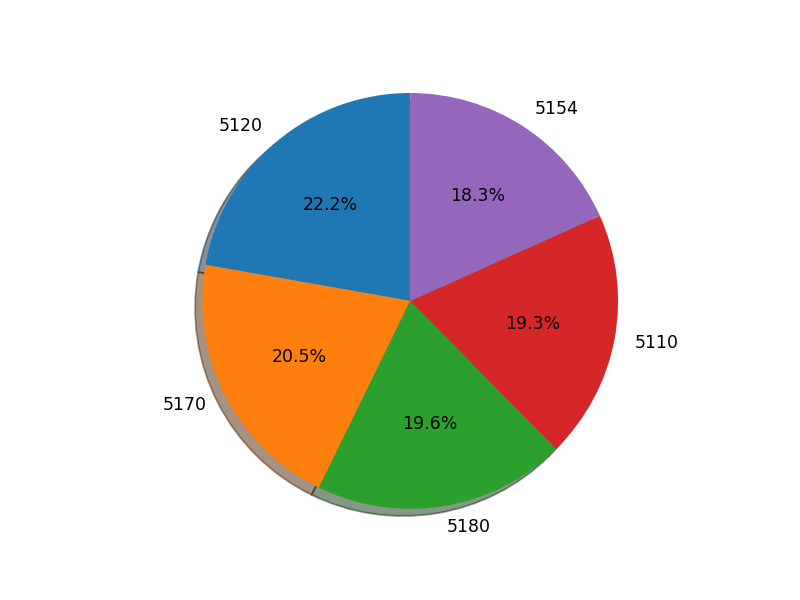

In [5]:
# Exercise 3 (We removed danish citizens to make the piechart more exciting)
import kkdata

neighbourhoods = set([])
age_range = set([])

def getdict(year):
    neighbourhoods.update(kkdata.STATISTICS[year].keys())

    for n in neighbourhoods:
        age_range.update(kkdata.STATISTICS[year][n].keys())

    ages = list(filter(lambda x: x > 20 and x < 65, age_range))

    coll = {}

    for n in neighbourhoods:
        for age in ages:
            if age in kkdata.STATISTICS[year][n].keys():
                c_codes = set(kkdata.STATISTICS[year][n][age].keys())
            for c_code in c_codes:
                coll.setdefault(c_code, 0)
                coll[c_code] += kkdata.STATISTICS[year][n][age][c_code]
    return coll
    
coll = getdict(2015)
# getting countrycodes of the 5 major citizengroups (excluding danes for more illustrative pie chart)
five_country_codes = (sorted(coll, key=coll.get, reverse=True)[:6])
five_country_codes.pop(0)

# getting amount of citizens in each group, again excluding danes
cit_list = list(coll.values())
cit_list.sort()
cit_list = cit_list[-6:]
cit_list.reverse()
cit_list.pop(0)

# printing pie chart
import matplotlib.pyplot as plt
labels = five_country_codes
sizes = cit_list
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## 4. (red assignment) Try to add the markers that you get from the GeoJson response exercise 2 to the map.